In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

In [3]:
input_path = r'/media/lumin/DATA/DATA_DEVRIM/Batch 2 Results - 20240426_113538/Batch 2 Results - 20240426_201822/20240426_201822_Confinement ratio.csv'
data = pd.read_csv(input_path)

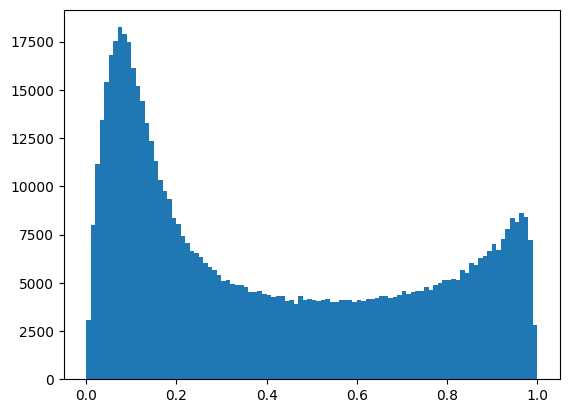

In [4]:

flat_list = []
for l in data.r_conf:
    split = l.split(', ')
    split[0] = split[0][1:]
    split[len(split)-1] = split[len(split)-1][:-1]
    for i in split:
        flat_list.append(float(i))

# flat_list

# a = flat_list[45].split(', ')
# # a.remove('[')
# print(type(a[0]))
# a[0][1:]
# # a
# len(a)
# a[438][:-1]
plt.hist(flat_list,bins=100)
plt.show()


In [ ]:
flat_list

In [12]:
flat_list = r_conf

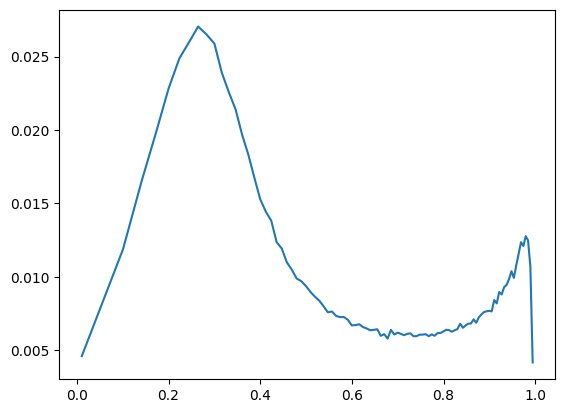

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

In [5]:
counts, bins = np.histogram(flat_list,bins=100)
len(bins)
bins = bins[:-1]
plt.plot(np.sqrt(bins),counts/sum(counts))
plt.show()
plt.close

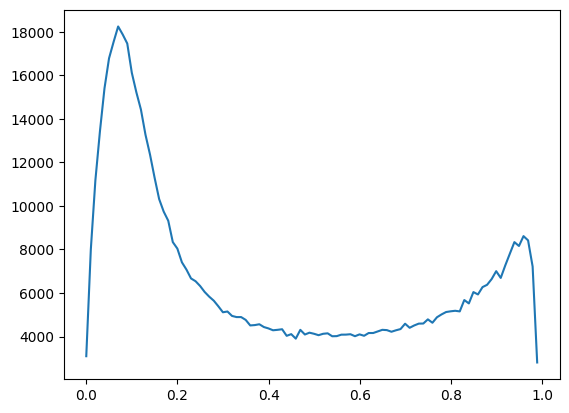

In [6]:
plt.plot(bins[0:100],counts[0:100])
plt.show()

In [7]:
z = np.polyfit(bins[0:90],np.log10(counts[0:90]/sum(counts)),5)
print(z)

[  85.70306423 -207.87537256  183.27894295  -68.3752984     8.51943721
   -1.98809795]


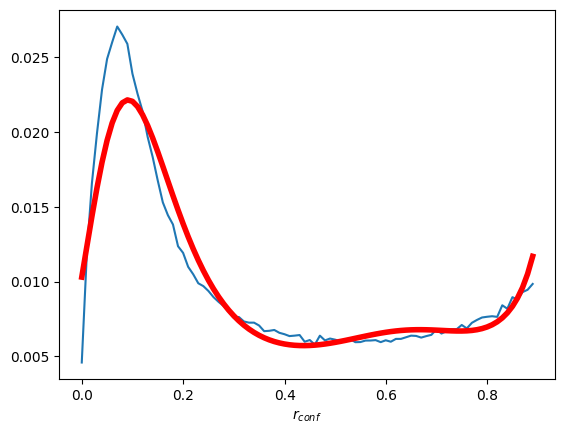

In [8]:
plt.plot(bins[0:90],(counts[0:90]/sum(counts)),label="Normalized counts")
plt.plot(bins[0:90],10**(np.polyval(z,bins[0:90])),linewidth=4,color ='r',label="Fit")
plt.xlabel(r"$r_{conf}$")
plt.show()

In [10]:
def pprime(x):
    return 5*z[0]*x**4 + 4*z[1]*x**3 + 3*z[2]*x**2 + 2*z[3]*x + z[4]

from scipy.optimize import newton
result = newton(pprime,0.4)
result

0.4372734356955063

In [3]:
def confinement(x: np.ndarray | pd.Series,
                y: np.ndarray | pd.Series,
                sw: int) -> list:
    """
    Calculate point-by-point confinement ratio.

    Parameters
    ----------
    x : array_like
        Array of x coordinates.
    y : array_like
        Array of y coordinates.
    sw : int
        Confinement ratio sliding window in number of points.

    Returns
    -------
    list
        List of point-by-point confinement ratio.

    """

    r_conf = []
    size = len(x)

    if (size >= 2*sw+1):
        # Extrapolate the confinement ratio at the beginning of the trajectory
        for i in range(sw):
            d_net = np.sqrt((x[sw*2]-x[0])**2+(y[sw*2]-y[0])**2)
            d_total = 0
            for u in range(2*sw):
                d_total = d_total + np.sqrt((x[u+1]-x[u])**2+(y[u+1]-y[u])**2)
            r_conf.append((d_net/d_total))

        for i in range(sw, size-sw):
            # Extrapolate a number of points equal to the sliding window at the end
            if (i == size-sw-1):
                d_total = 0
                d_net = np.sqrt((x[i+sw]-x[i-sw])**2+(y[i+sw]-y[i-sw])**2)
                for j in range(2*sw):
                    d_total = d_total + np.sqrt((x[(i-sw)+j+1]-x[(i-sw)+j])**2+(y[(i-sw)
                                                +j+1]-y[(i-sw)+j])**2)
                if (d_total != 0):
                    for p in range(sw+1):
                        r_conf.append((d_net/d_total))
                else:
                    for p in range(sw+1):
                        r_conf.append(0)
            else:

                d_total = 0
                d_net = np.sqrt((x[i+sw]-x[i-sw])**2+(y[i+sw]-y[i-sw])**2)
                for j in range(2*sw):
                    d_total = d_total + np.sqrt((x[(i-sw)+j+1]-x[(i-sw)+j])**2+(y[(i-sw)
                                                +j+1]-y[(i-sw)+j])**2)
                if (d_total != 0):
                        r_conf.append((d_net/d_total))
                else:
                        r_conf.append(0)
    else:
        pass
    return r_conf

In [4]:
traj1 = pd.read_csv('/home/lumin/Documents/traj1.csv')
traj1 = traj1.loc[traj1.particle==1]

In [5]:
r_conf = confinement(traj1.x, traj1.y, 9)
traj1['r_conf'] = r_conf

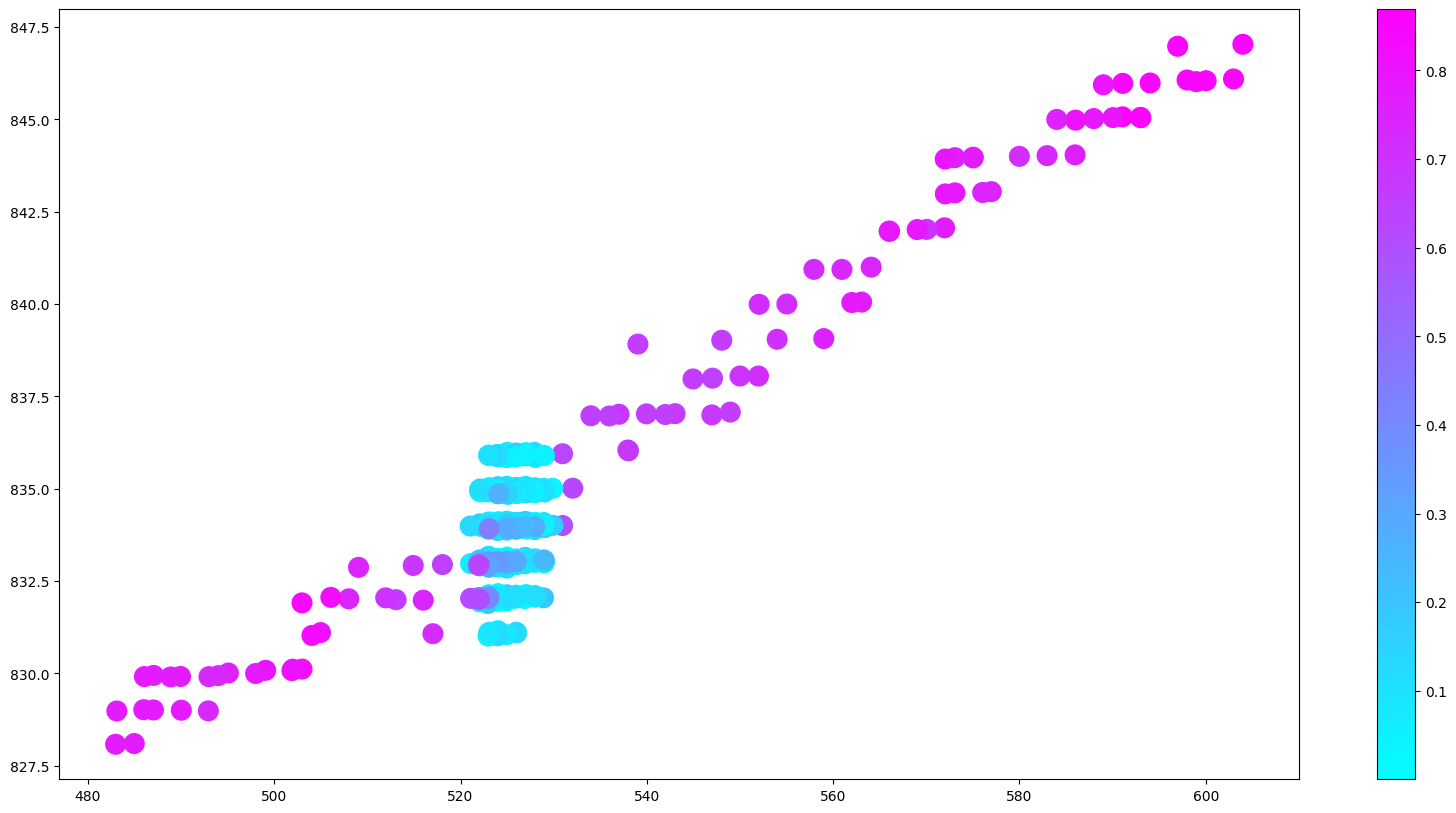

In [6]:
fig, ax1 = plt.subplots()
fig.set_size_inches(20, 10)
t = ax1.scatter(traj1.x, traj1.y,c=r_conf,cmap='cool',s=200)
fig.colorbar(t, ax=ax1)
plt.show()

In [10]:
thr = 0.4
tgo = traj1.loc[traj1.r_conf > thr]
tstop = traj1.loc[traj1.r_conf <= thr]

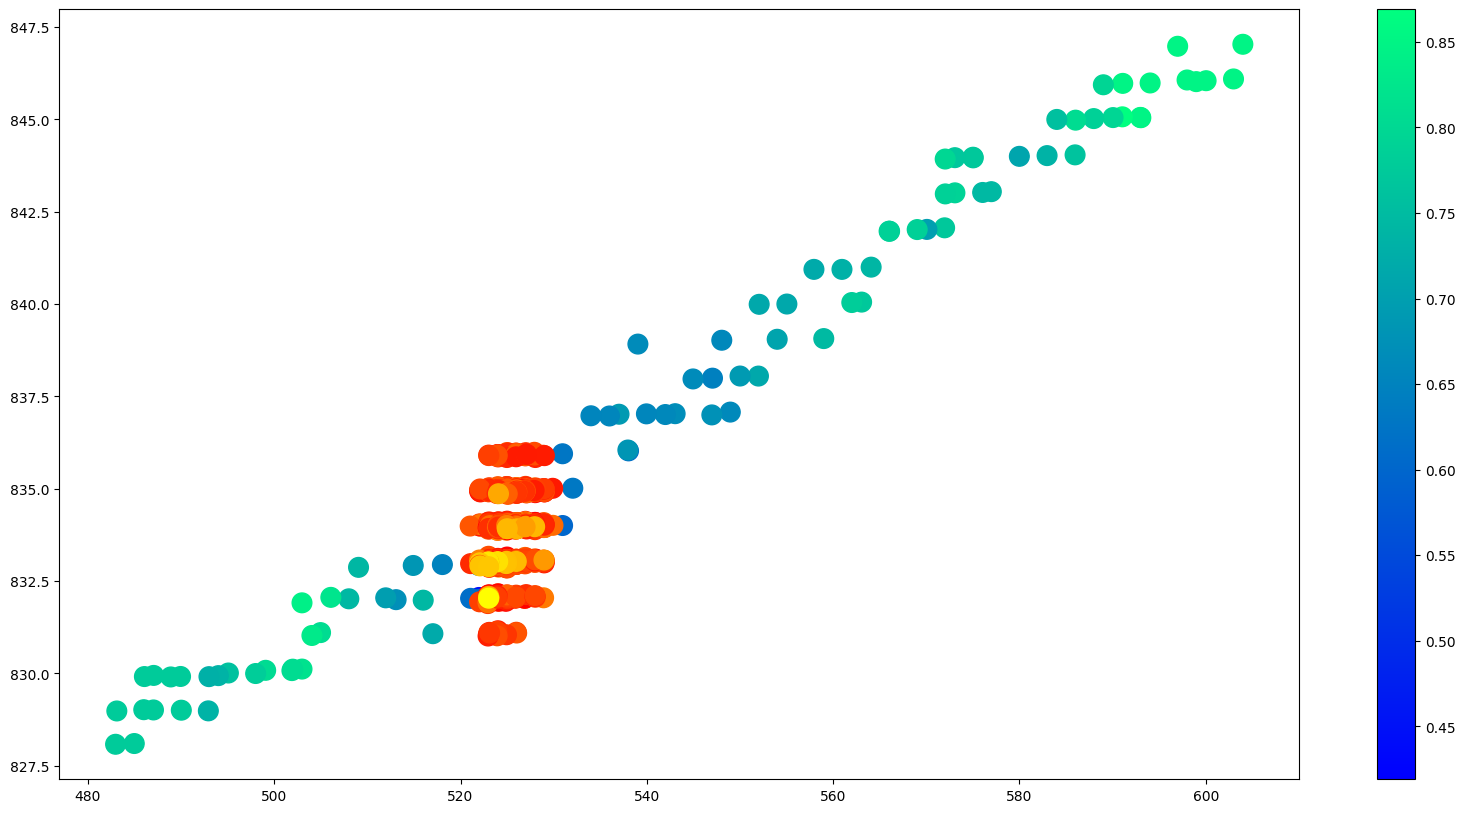

In [11]:
fig, ax1 = plt.subplots()
fig.set_size_inches(20, 10)
go = ax1.scatter(tgo.x, tgo.y,c=tgo.r_conf,cmap='winter',s=200)
stop = ax1.scatter(tstop.x, tstop.y,c=tstop.r_conf,cmap='autumn',s=200)
fig.colorbar(go, ax=ax1)
plt.show()

In [ ]:
fig, ax1 = plt.subplots()
fig.set_size_inches(20, 10)
t = ax1.scatter(tstop.x, tstop.y,c=tstop.r_conf,cmap='autumn',s=200)
fig.colorbar(t, ax=ax1)
plt.show()